In [4]:
import pandas as pd

# Load the dataset
file_path = '/SaaS-Sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary info of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        6425 non-null   int64  
 1   Order ID      6425 non-null   object 
 2   Order Date    6425 non-null   object 
 3   Date Key      6425 non-null   int64  
 4   Contact Name  6425 non-null   object 
 5   Country       6425 non-null   object 
 6   City          6425 non-null   object 
 7   Region        6425 non-null   object 
 8   Subregion     6425 non-null   object 
 9   Customer      6425 non-null   object 
 10  Customer ID   6425 non-null   int64  
 11  Industry      6425 non-null   object 
 12  Segment       6425 non-null   object 
 13  Product       6425 non-null   object 
 14  License       6425 non-null   object 
 15  Sales         6425 non-null   float64
 16  Quantity      6424 non-null   float64
 17  Discount      6424 non-null   float64
 18  Profit        6424 non-null 

(None,
    Row ID          Order ID  Order Date  Date Key    Contact Name  \
 0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
 1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
 2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
 3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
 4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
 
          Country           City Region Subregion           Customer  \
 0        Ireland         Dublin   EMEA      UKIR            Chevron   
 1        Ireland         Dublin   EMEA      UKIR            Chevron   
 2  United States  New York City   AMER     NAMER        Phillips 66   
 3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
 4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
 
    Customer ID Industry    Segment                 Product     License  \
 0         1017   Energy        SMB         Marketing Suite  1

In [5]:
# Check for missing values and duplicate rows
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

missing_values, duplicate_rows


(Row ID          0
 Order ID        0
 Order Date      0
 Date Key        0
 Contact Name    0
 Country         0
 City            0
 Region          0
 Subregion       0
 Customer        0
 Customer ID     0
 Industry        0
 Segment         0
 Product         0
 License         0
 Sales           0
 Quantity        1
 Discount        1
 Profit          1
 dtype: int64,
 0)

In [6]:
# Checking for outliers in numerical columns (Sales, Profit, Discount, Quantity) using summary statistics
numerical_columns = ['Sales', 'Profit', 'Discount', 'Quantity']
summary_stats = data[numerical_columns].describe()

summary_stats


,Sales,Profit,Discount,Quantity
count,6425.000000,6424.000000,6424.000000,6424.000000
mean,225.893133,26.532363,0.151060,3.781600
std,597.373367,196.467345,0.202547,2.223625
min,0.444000,-3839.990400,0.000000,1.000000
25%,17.140000,1.971150,0.000000,2.000000
50%,53.250000,8.865500,0.150000,3.000000
75%,209.986000,29.275125,0.200000,5.000000
max,22638.480000,5039.985600,0.800000,14.000000


from matplotlib import pyplot as plt
summary_stats['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Discount'].plot(kind='hist', bins=20, title='Discount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='Sales', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='Profit', y='Discount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='Discount', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Discount'].plot(kind='line', figsize=(8, 4), title='Discount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

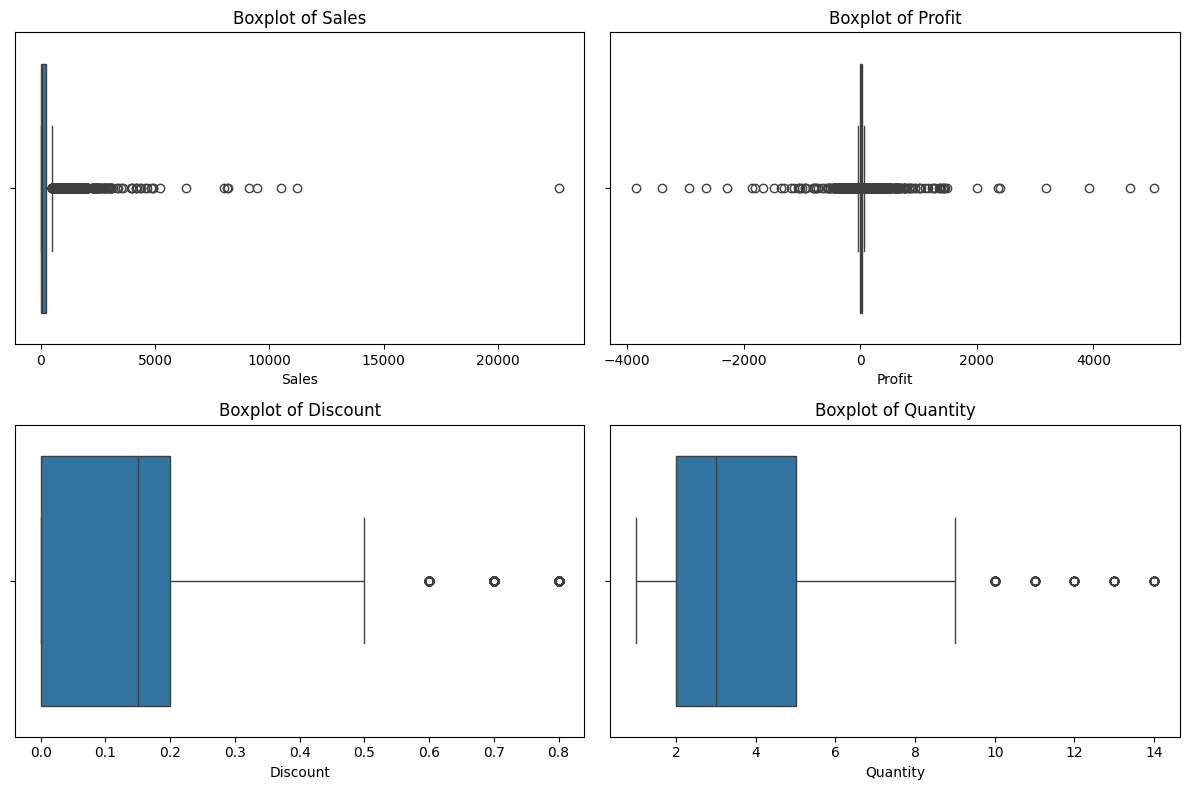

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure for boxplots
plt.figure(figsize=(12, 8))

# Plotting boxplots for the numerical columns
numerical_columns = ['Sales', 'Profit', 'Discount', 'Quantity']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


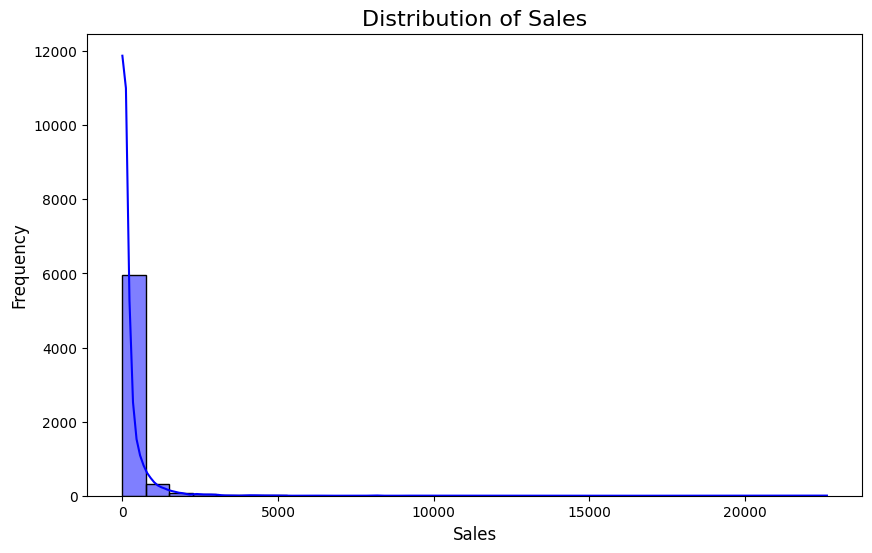

count     6425.000000
mean       225.893133
std        597.373367
min          0.444000
25%         17.140000
50%         53.250000
75%        209.986000
max      22638.480000
Name: Sales, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure for the sales distribution plot
plt.figure(figsize=(10, 6))

# Plotting a histogram for sales
sns.histplot(data['Sales'], bins=30, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Summary statistics for Sales
sales_summary = data['Sales'].describe()
print(sales_summary)


<ipython-input-9-5e9436166363>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Region', data=sales_by_region, palette='Blues_d')


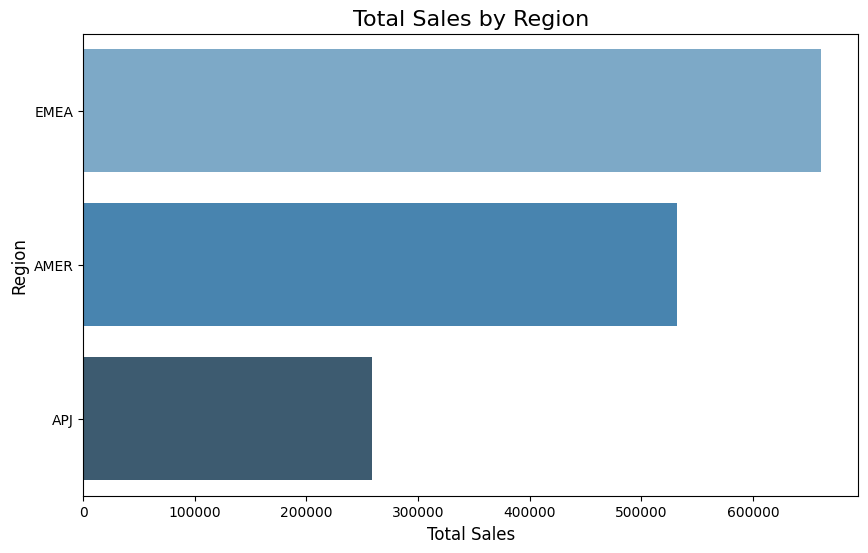

  Region        Sales
2   EMEA  661020.5420
0   AMER  531569.8795
1    APJ  258772.9554


In [9]:
# Grouping data by Region and calculating total sales per region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()

# Sorting values by Sales in descending order for better visualization
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Plotting total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Region', data=sales_by_region, palette='Blues_d')

# Adding titles and labels
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

# Display total sales by region
print(sales_by_region)


<ipython-input-10-c0087cc735e7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product', data=top_products, palette='viridis')


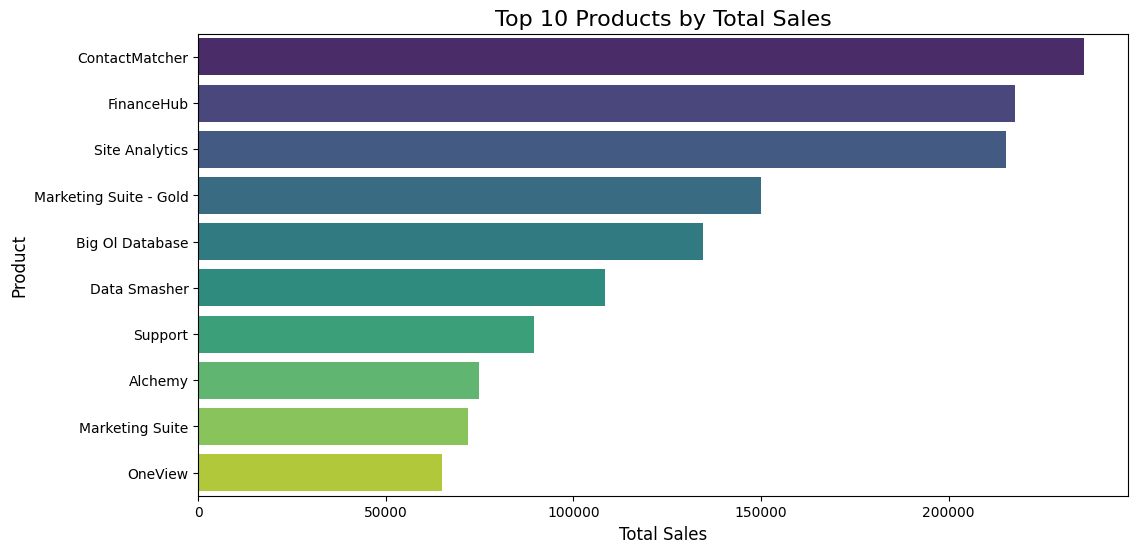

                   Product        Sales
3           ContactMatcher  236073.6670
5               FinanceHub  217727.2230
11          Site Analytics  215396.9560
7   Marketing Suite - Gold  149996.5360
1          Big Ol Database  134595.2270
4             Data Smasher  108438.5700
13                 Support   89397.2640
0                  Alchemy   74908.8700
6          Marketing Suite   71976.7349
8                  OneView   65064.2810


In [10]:
# Grouping data by Product and calculating total sales for each product
sales_by_product = data.groupby('Product')['Sales'].sum().reset_index()

# Sorting values by Sales in descending order to get the top products
sales_by_product = sales_by_product.sort_values(by='Sales', ascending=False)

# Selecting the top 10 products for visualization
top_products = sales_by_product.head(10)

# Plotting total sales for top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product', data=top_products, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

# Display total sales by product
print(top_products)


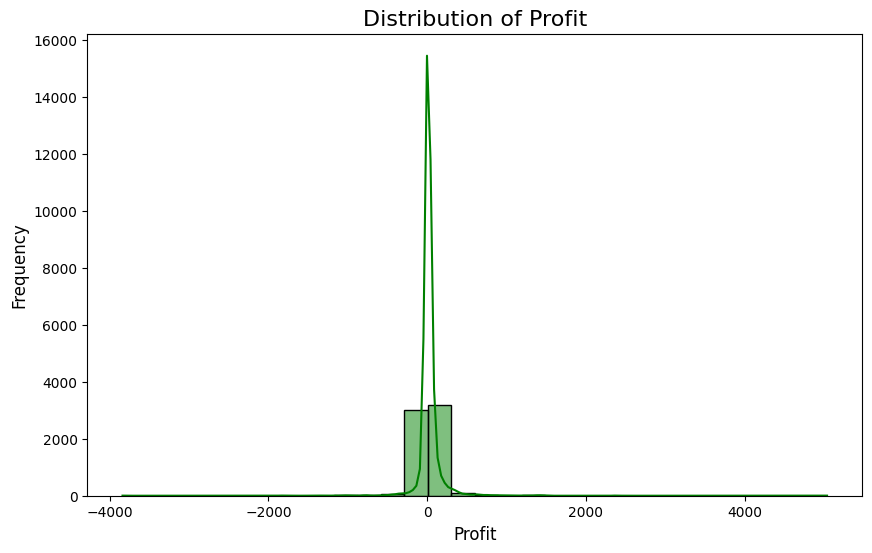

count    6424.000000
mean       26.532363
std       196.467345
min     -3839.990400
25%         1.971150
50%         8.865500
75%        29.275125
max      5039.985600
Name: Profit, dtype: float64


In [11]:
# Visualizing the distribution of profit
plt.figure(figsize=(10, 6))

# Plotting a histogram for profit
sns.histplot(data['Profit'], bins=30, kde=True, color='green')

# Adding titles and labels
plt.title('Distribution of Profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Summary statistics for Profit
profit_summary = data['Profit'].describe()
print(profit_summary)


<ipython-input-12-d92eafd455a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Region', data=profit_by_region, palette='Greens_d')


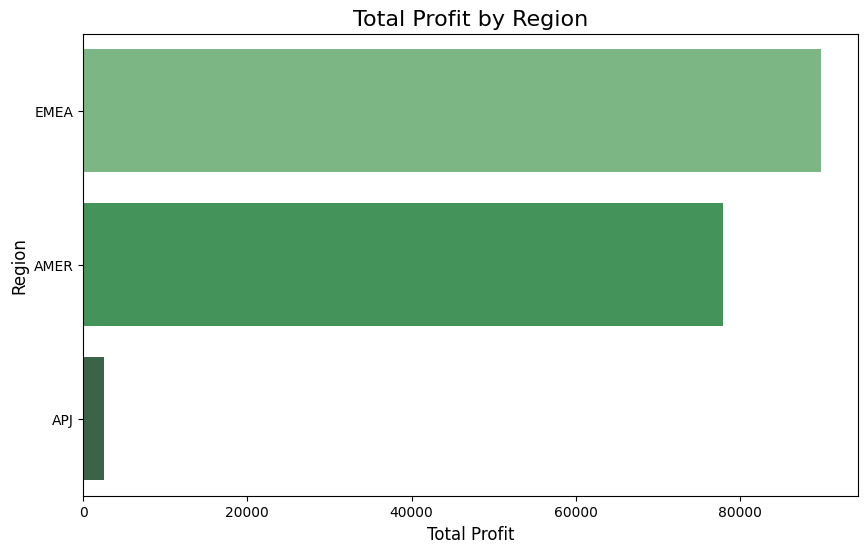

  Region      Profit
2   EMEA  89900.8149
0   AMER  77951.9421
1    APJ   2591.1432


In [12]:
# Grouping data by Region and calculating total profit per region
profit_by_region = data.groupby('Region')['Profit'].sum().reset_index()

# Sorting values by Profit in descending order
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Plotting total profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Region', data=profit_by_region, palette='Greens_d')

# Adding titles and labels
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

# Display total profit by region
print(profit_by_region)


<ipython-input-13-a1090bbe056a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Product', data=top_products_profit, palette='coolwarm')


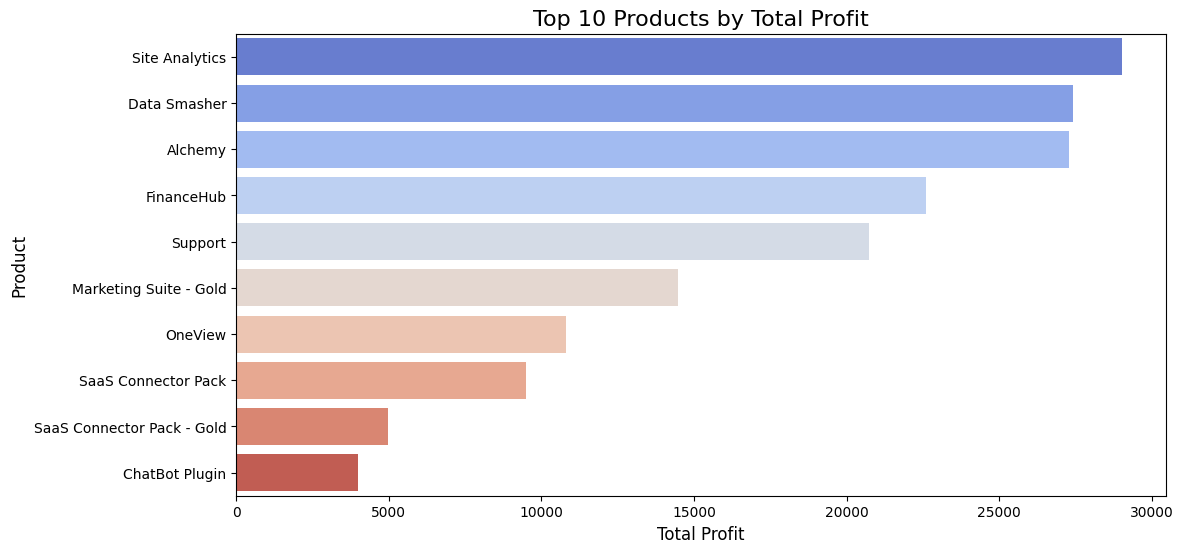

                       Product      Profit
11              Site Analytics  29013.2991
4                 Data Smasher  27407.5382
0                      Alchemy  27294.1081
5                   FinanceHub  22604.3544
13                     Support  20741.0630
7       Marketing Suite - Gold  14484.6346
8                      OneView  10810.3192
9          SaaS Connector Pack   9489.9408
10  SaaS Connector Pack - Gold   4958.6282
2               ChatBot Plugin   4007.0795


In [13]:
# Grouping data by Product and calculating total profit for each product
profit_by_product = data.groupby('Product')['Profit'].sum().reset_index()

# Sorting values by Profit in descending order
profit_by_product = profit_by_product.sort_values(by='Profit', ascending=False)

# Selecting the top 10 products by profit
top_products_profit = profit_by_product.head(10)

# Plotting total profit for top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Product', data=top_products_profit, palette='coolwarm')

# Adding titles and labels
plt.title('Top 10 Products by Total Profit', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

# Display total profit by product
print(top_products_profit)


In [14]:
# Summary statistics for Discounts
discount_summary = data['Discount'].describe()
print(discount_summary)


count    6424.000000
mean        0.151060
std         0.202547
min         0.000000
25%         0.000000
50%         0.150000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64


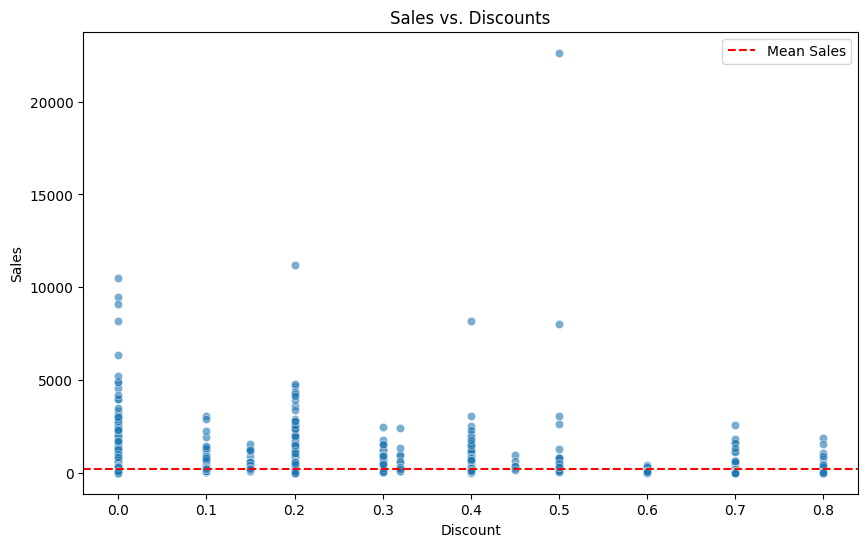

In [15]:
# Visualizing Sales vs. Discounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=data, alpha=0.6)
plt.title('Sales vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.axhline(y=data['Sales'].mean(), color='r', linestyle='--', label='Mean Sales')
plt.legend()
plt.show()


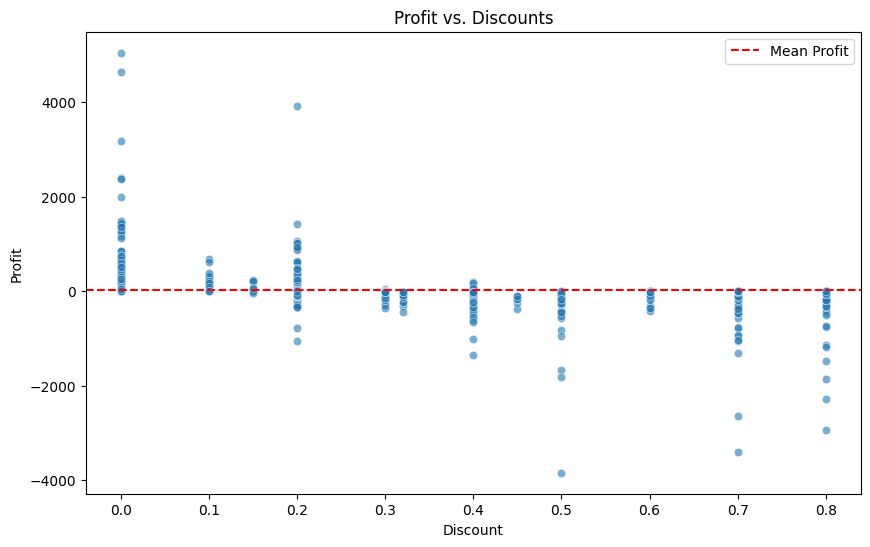

In [16]:
# Visualizing Profit vs. Discounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data, alpha=0.6)
plt.title('Profit vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(y=data['Profit'].mean(), color='r', linestyle='--', label='Mean Profit')
plt.legend()
plt.show()


<ipython-input-17-91df47eb5fa1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_profit = data.groupby('Discount_Range').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()


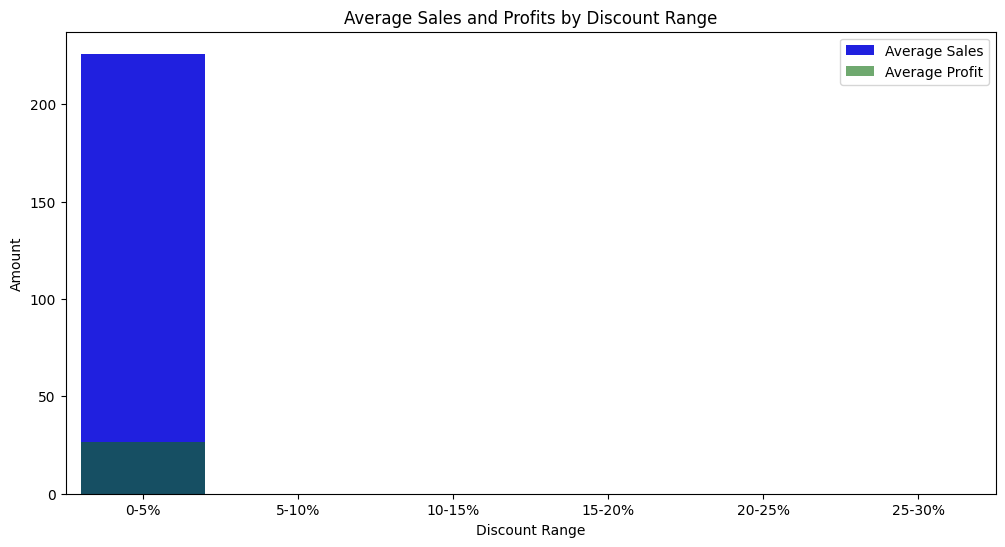

  Discount_Range       Sales     Profit
0           0-5%  225.925277  26.532363
1          5-10%         NaN        NaN
2         10-15%         NaN        NaN
3         15-20%         NaN        NaN
4         20-25%         NaN        NaN
5         25-30%         NaN        NaN


In [17]:
# Creating discount bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%']
data['Discount_Range'] = pd.cut(data['Discount'], bins=bins, labels=labels, right=False)

# Calculating average sales and profits by discount range
avg_sales_profit = data.groupby('Discount_Range').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Plotting average sales and profits by discount range
plt.figure(figsize=(12, 6))
sns.barplot(x='Discount_Range', y='Sales', data=avg_sales_profit, color='blue', label='Average Sales')
sns.barplot(x='Discount_Range', y='Profit', data=avg_sales_profit, color='green', label='Average Profit', alpha=0.6)
plt.title('Average Sales and Profits by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Display average sales and profits by discount range
print(avg_sales_profit)


In [18]:
# Calculating correlation matrix
correlation_matrix = data[['Sales', 'Profit', 'Discount']].corr()
print(correlation_matrix)


             Sales    Profit  Discount
Sales     1.000000  0.327156  -0.01692
Profit    0.327156  1.000000  -0.25244
Discount -0.016920 -0.252440   1.00000


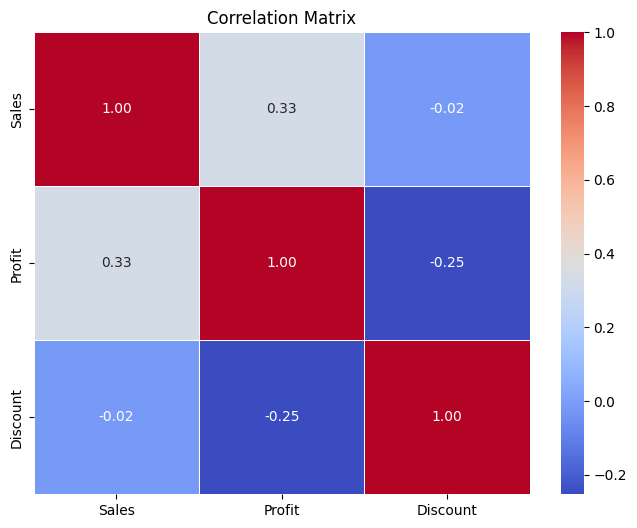

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
